In [1]:
batch_size = 32
look_back = 3

In [2]:
# klines = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220102090000_20220102205900.csv')
# klines2 = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220102210000_20220103085900.csv')

In [59]:
import os
import numpy as np
import pandas as pd

def search(dirname):
    fileList = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        if filename != '.DS_Store' :
            full_filename = os.path.join(dirname, filename)
            fileList.append(full_filename)

    return fileList


def create_LSTM_dataset(data) :
    data_arr = data
    x_arr = []
    y_arr = []

    for i in range(len(data_arr) - look_back):
        x_arr.append(data_arr[i:i + look_back, 0:data_arr.shape[1]])
        y_arr.append(data_arr[i + look_back, 3])

    x_arr, y_arr = np.array(x_arr), np.array(y_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1],x_arr.shape[2]))

    return x_arr, y_arr


def create_LSTM_dataset_many_to_many(data):
    data_arr = data
    x_arr = []
    y_arr = []

    for i in range(len(data_arr) - look_back):
        x_arr.append(data_arr[i:i + look_back, 1:data_arr.shape[1]])
        y_arr.append(data_arr[i + look_back, 0:3])

    x_arr = np.array(x_arr)
    y_arr = np.array(y_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], x_arr.shape[2]))
    y_arr = np.reshape(y_arr, (y_arr.shape[0], y_arr.shape[1]))

    return x_arr, y_arr


def create_LSTM_dataset_X(data):
    data_arr = data
    x_arr = []

    for i in range(len(data_arr) - look_back - 1):
        x_arr.append(data_arr[i:i + look_back, 0:data_arr.shape[1]])

    x_arr = np.array(x_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], x_arr.shape[2]))

    return x_arr

def create_LSTM_dataset_Y(data):
    data_arr = data
    y_arr = []

    for i in range(len(data_arr) - look_back - 1):
        y_arr.append(data_arr[i + look_back + 1, 0:data_arr.shape[1]])

    y_arr = np.array(y_arr)
    y_arr = np.reshape(y_arr, (y_arr.shape[0], y_arr.shape[1]))

    return y_arr


In [40]:
path = 'resource/dataset/binance/'

fileList = search(path)
fileList = np.sort(fileList)

fileList

array(['resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220101210000_20220102085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220102090000_20220102205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220102210000_20220103085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220103090000_20220103205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220103210000_20220104085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220104090000_20220104205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220104210000_20220105085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220105090000_20220105205900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220105210000_20220106085900.csv',
       'resource/dataset/binance/klines-BTCUSDT-1m_20220106090000_20220106205900.csv',
       'resource/dataset/binance/klines-BTC

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

klines = pd.DataFrame()

for i in range(len(fileList) - 1) :
    fileNm = fileList[i]
    tmp = pd.read_csv(fileNm)
    klines = pd.concat([klines,tmp])

klines.index = klines['openTime']

# klines_dataset = pd.DataFrame({'close':klines['close'].diff(axis=1)
#                                 ,'volume': klines['volume'].diff()
#                                 ,'buyVolume': klines['takerBuyBaseAssetVolume'].diff()
#                                 , 'sellVolume': klines['takerBuyQuoteAssetVolume'].diff()
#                                 , 'trades' : klines['numberOfTrades'].diff()})

klines_dataset = pd.DataFrame(klines.diff())

klines_dataset = klines_dataset.dropna()
del klines_dataset['openTime']
del klines_dataset['closeTime']
del klines_dataset['ignore']
#
# del klines_dataset['open']
# del klines_dataset['volume']
# del klines_dataset['quoteAssetVolume']
# del klines_dataset['numberOfTrades']

In [8]:
klines_dataset

,open,high,low,close,volume,quoteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume
openTime,,,,,,,,,
20220101090100,33.07,73.15,26.02,62.76,1.80532,8.592983e+04,177.0,1.66436,78779.123851
20220101090200,62.76,37.46,58.36,55.97,8.91849,4.155057e+05,265.0,-6.17736,-284914.870357
20220101090300,55.97,9.80,21.51,-37.65,-20.84061,-9.654101e+05,-285.0,-6.62607,-306825.975699
20220101090400,-37.66,-55.39,-14.26,-9.74,-9.49865,-4.409940e+05,-362.0,-4.63097,-214988.792829
20220101090500,-9.73,107.46,-20.00,114.69,14.90653,6.927933e+05,371.0,8.45071,392823.989991
...,...,...,...,...,...,...,...,...,...
20220417205500,-11.89,-3.21,0.00,5.04,-0.97529,-3.939658e+04,15.0,-0.96351,-38930.632037
20220417205600,5.04,-0.59,5.05,3.06,-3.40672,-1.376701e+05,-60.0,-1.86486,-75356.096562
20220417205700,3.05,9.89,3.05,9.88,0.69048,2.794051e+04,17.0,1.11586,45124.766915


<AxesSubplot:>

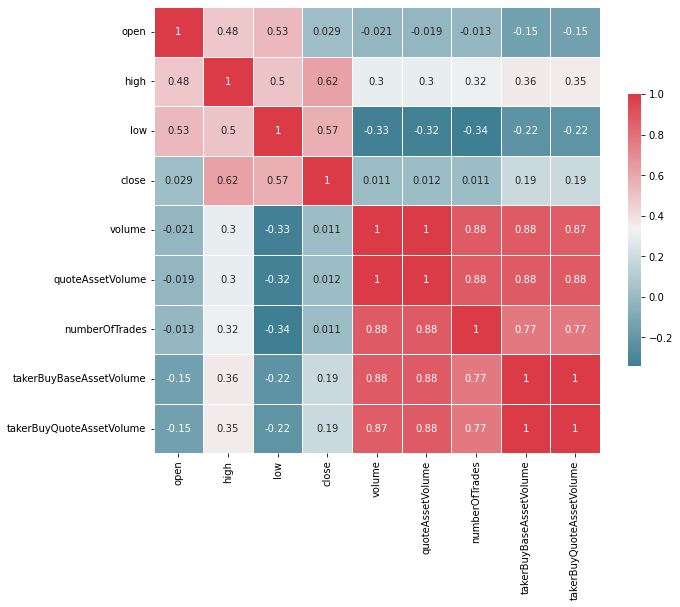

In [155]:
corrDf = klines_dataset.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrDf, cmap=cmap, annot=True, square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [1384]:
# train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1, shuffle=False)


,open,high,low,close
openTime,,,,
20220101090100,33.07,73.15,26.02,62.76
20220101090200,62.76,37.46,58.36,55.97
20220101090300,55.97,9.80,21.51,-37.65
20220101090400,-37.66,-55.39,-14.26,-9.74
20220101090500,-9.73,107.46,-20.00,114.69
...,...,...,...,...
20220327134300,17.25,2.16,3.26,-13.98
20220327134400,-13.99,-16.14,-32.57,-32.58
20220327134500,-32.57,-22.91,-4.46,9.67


In [61]:
# 학습데이터 분류
train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1, shuffle=False)
# train, test = train_test_split(klines_dataset, test_size=0.2, random_state=1)

# 검증데이터 분류
train, val = train_test_split(train, test_size=0.2, random_state=1, shuffle=False)
# train, val = train_test_split(train, test_size=0.2, random_state=1, shuffle=False)
# train, val = train_test_split(train_scaled, test_size=0.2, random_state=1)

x_train = train[['high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume',
                    'takerBuyQuoteAssetVolume']]
x_val = val[['high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume',
                    'takerBuyQuoteAssetVolume']]
x_test = test[['high', 'low', 'close', 'volume', 'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseAssetVolume',
                    'takerBuyQuoteAssetVolume']]

y_train = train[['open','high','low']]
y_val = val[['open','high','low']]
y_test = test[['open','high','low']]

# 전처리 : 정규화
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

x_scaler.fit(x_train)
y_scaler.fit(y_train)

x_train_scaled = x_scaler.transform(x_train)
x_val_scaled = x_scaler.transform(x_val)
x_test_scaled = x_scaler.transform(x_test)

y_train_scaled = y_scaler.transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)


x_train_scaled = create_LSTM_dataset_X(x_train_scaled)
x_val_scaled = create_LSTM_dataset_X(x_val_scaled)
x_test_scaled = create_LSTM_dataset_X(x_test_scaled)

y_train_scaled = create_LSTM_dataset_Y(y_train_scaled)
y_val_scaled = create_LSTM_dataset_Y(y_val_scaled)
y_test_scaled = create_LSTM_dataset_Y(y_test_scaled)
# x_val, y_val = create_LSTM_dataset_many_to_many(val)
# x_test, y_test = create_LSTM_dataset_many_to_many(test)

print(x_train_scaled.shape)

# x_train, y_train = create_LSTM_dataset(train)
# x_val, y_val = create_LSTM_dataset(val)
# x_test, y_test = create_LSTM_dataset(test_scaled)

# x_train, y_train = create_LSTM_dataset_many_to_many(np.array(train))
# x_val, y_val = create_LSTM_dataset_many_to_many(val)
# x_test, y_test = create_LSTM_dataset_many_to_many(test)




#
# x_train, y_train = create_LSTM_dataset_many_to_many(np.array(train))
# x_val, y_val = create_LSTM_dataset_many_to_many(np.array(val))
# x_test, y_test = create_LSTM_dataset_many_to_many(np.array(test))



(98145, 3, 8)


In [99]:
# b = x_scaler.inverse_transform(x_test_scaled[2])
# b
# a = y_scaler.inverse_transform(y_test_scaled)
# a
real_predictions

array([[-1.8184404, -1.9433334, -1.9424733],
       [-1.8214164, -1.9469281, -1.9369425],
       [-1.8127323, -1.9427602, -1.9273981],
       ...,
       [-1.8104881, -1.9346849, -1.9218184],
       [-1.810976 , -1.9380193, -1.9275938],
       [-1.8133665, -1.9417704, -1.9377745]], dtype=float32)

In [101]:
import tensorflow as tf

model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(18, input_shape=(look_back, x_train.shape[2]), return_sequences=True))
# model.add(tf.keras.layers.Input(shape=(look_back, x_train.shape[2])))
# model.add(tf.keras.layers.LSTM(2))
# model.add(tf.keras.layers.LSTM(4, input_shape=(look_back, x_train.shape[2]), return_sequences=True, activation='relu'))
model.add(tf.keras.layers.LSTM(4, input_shape=(look_back, x_train_scaled.shape[2])))
# model.add(tf.keras.layers.LSTM(8, input_shape=(look_back, x_train_scaled.shape[2])))
model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.LSTM(16,return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.LSTM(16))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.LSTM(16, activation='relu', return_sequences=True))
# model.add(tf.keras.layers.Dropout(0.5))
#
# model.add(tf.keras.layers.LSTM(16))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(4, activation='linear')))
model.add(tf.keras.layers.Dense(3, activation='linear'))
# model.add(tf.keras.layers.Dense(4, activation='linear'))

In [109]:
# sgd = tf.keras.optimizers.Adam(learning_rate=0.00000001)
# model.compile(loss='mse',optimizer=sgd,metrics=['accuracy'])

# from keras.optimizers import SGD
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = "mean_squared_error", optimizer = adam)
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 4)                 208       
                                                                 
 dropout_21 (Dropout)        (None, 4)                 0         
                                                                 
 dense_9 (Dense)             (None, 3)                 15        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________


In [110]:
hist = model.fit(x_train_scaled, y_train_scaled, epochs=500, batch_size=256, validation_data=(x_val_scaled, y_val_scaled))

Epoch 1/500
384/384 [==============================] - 4s 5ms/step - loss: 5.0193e-04 - val_loss: 3.7035e-04
Epoch 2/500
384/384 [==============================] - 2s 4ms/step - loss: 5.0153e-04 - val_loss: 3.6912e-04
Epoch 3/500
384/384 [==============================] - 2s 6ms/step - loss: 5.0192e-04 - val_loss: 3.6869e-04
Epoch 4/500
384/384 [==============================] - 1s 4ms/step - loss: 5.0153e-04 - val_loss: 3.7048e-04
Epoch 5/500
384/384 [==============================] - 1s 3ms/step - loss: 5.0192e-04 - val_loss: 3.6885e-04
Epoch 6/500
384/384 [==============================] - 1s 4ms/step - loss: 5.0207e-04 - val_loss: 3.6860e-04
Epoch 7/500
384/384 [==============================] - 1s 3ms/step - loss: 5.0178e-04 - val_loss: 3.6969e-04
Epoch 8/500
384/384 [==============================] - 1s 3ms/step - loss: 5.0186e-04 - val_loss: 3.6885e-04
Epoch 9/500
384/384 [==============================] - 1s 3ms/step - loss: 5.0197e-04 - val_loss: 3.7006e-04
Epoch 10/500
384/38

In [95]:

a = y_scaler.inverse_transform(y_test_scaled)
a

# b = x_scaler.inverse_transform(x_test_scaled[0])
# b


array([[  2.07, -15.9 , -16.48],
       [ -8.18,  -6.85,   1.33],
       [ -9.83,   1.52,  -4.63],
       ...,
       [  3.05,   9.89,   3.05],
       [  9.9 ,  22.  ,   9.89],
       [ 22.  ,  35.  ,  22.  ]])

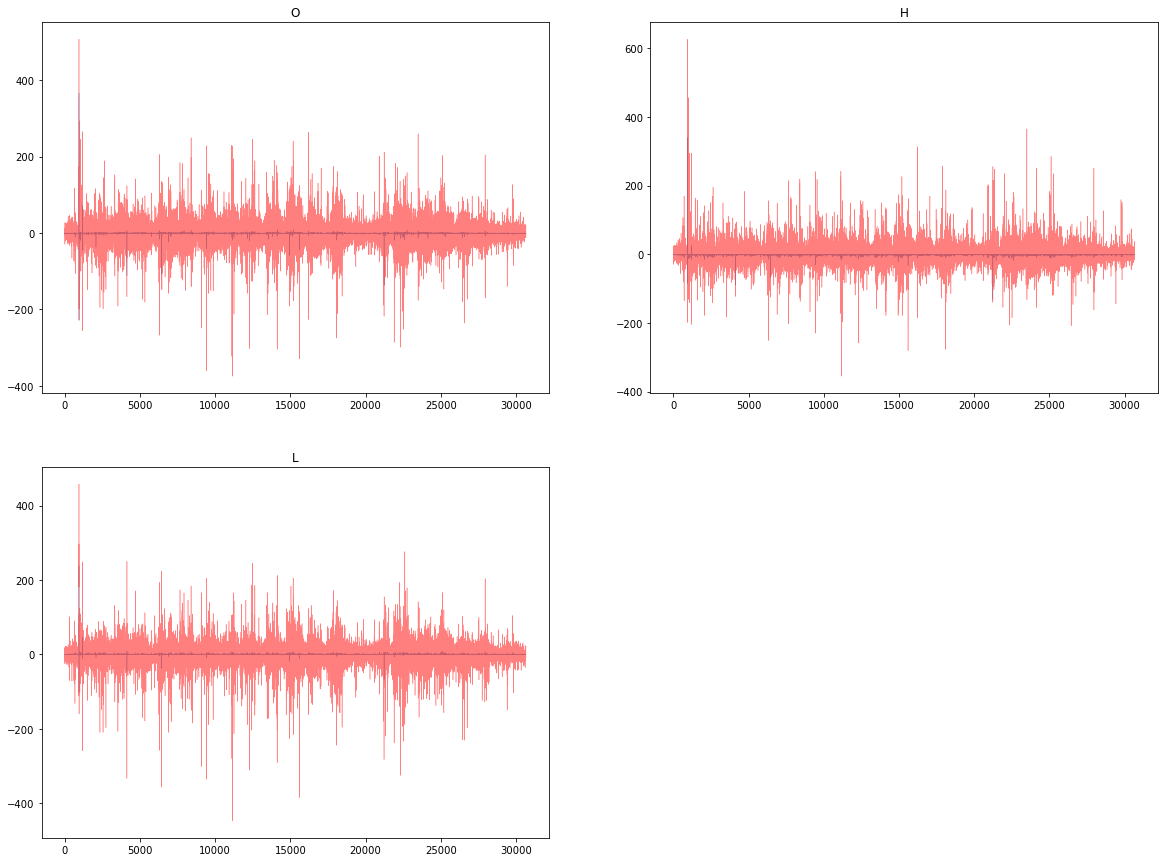

In [111]:
y_predict = model.predict(x_test_scaled)

real_predictions = y_scaler.inverse_transform(y_predict)
fact = y_scaler.inverse_transform(y_test_scaled)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,len(real_predictions))

plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('O')
plt.plot(x, real_predictions[:,0],x, fact[:,0] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(222)
plt.title('H')
plt.plot(x, real_predictions[:,1],x, fact[:,1] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(223)
plt.title('L')
plt.plot(x, real_predictions[:,2],x, fact[:,2] , 'r-', linewidth='0.5', alpha=.5)

# plt.subplot(224)
# plt.title('C')
# plt.plot(x, real_predictions[:,3],x, fact[:,3] , 'r-', linewidth='0.5', alpha=.5)

plt.show()

InvalidIndexError: (slice(None, None, None), 0)

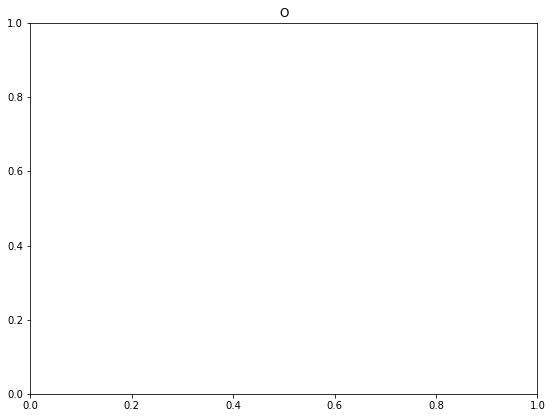

In [67]:
x = np.arange(0,len(real_predictions))

plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title('O')
plt.plot(x, y_predict[:,0],x, y_test[:,0] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(222)
plt.title('H')
plt.plot(x, y_predict[:,1],x, y_test[:,1] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(223)
plt.title('L')
plt.plot(x, y_predict[:,2],x, y_test[:,2] , 'r-', linewidth='0.5', alpha=.5)

plt.subplot(224)
plt.title('C')
plt.plot(x, y_predict[:,3],x, y_test[:,3] , 'r-', linewidth='0.5', alpha=.5)

plt.show()

In [1429]:
results = model.evaluate(x_test, y_test, batch_size=32)
results

959/959 [==============================] - 1s 1ms/step - loss: 2.3912e-04


0.00023912073811516166

In [ ]:
import matplotlib.pyplot as plt

origin = scaler.inverse_transform(y_test.reshape(y_test.shape[0],1))
predict = scaler.inverse_transform(y_predict)

plt.plot(origin, color='g')
plt.plot(predict, color='r')


In [112]:

# model = tf.keras.models.load_model("resource/model/regression_20220415.h5")
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("LSTM_Binance-Kline_20220508.h5")

# It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_h5_model.h5")

In [ ]:
import numpy as np
def create_dataset(signal_data, look_back=1):
    x_arr, y_arr = [], []
    for i in range(len(signal_data) - look_back):
        x_arr.append(signal_data[i:(i + look_back), 0])
        y_arr.append(signal_data[i + look_back, 0])

    x_arr = np.array(x_arr)
    x_arr = np.reshape(x_arr, (x_arr.shape[0], x_arr.shape[1], 1))
    return x_arr, np.array(y_arr)

klines_dataset = pd.read_csv('resource/dataset/binance/klines-BTCUSDT-1m_20220101090000_20220101205900.csv').to_numpy()

# 훈련
train = klines_dataset[0:int(len(klines_dataset) * 0.5)]
# 검증
val = klines_dataset[int(len(klines_dataset) * 0.5):int(len(klines_dataset) * 0.75)]
# 시험
test = klines_dataset[int(len(klines_dataset) * 0.75):-1]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)
